# Procederemos a implementar metodos de clustering para identificar los clientes y en que grupos es posible clasificarlos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data = pd.read_excel('/content/gdrive/MyDrive/ventas.xlsx', parse_dates=["FechaVenta"])
data

,IdFactura,CodProducto,FechaVenta,Mes,Año,HoraVenta,IdCliente,NomApeCiudCli,Ciudad,NomApeEmp,...,CategoriaProducto,Cantidad,PrecioDet,IvaDet,DescuentoDet,VlrIva,VlrDescuento,VlrAPagar,PrecioCompraDet,Utilidad
0,24075,12182,2018-01-03 00:00:00,enero,2018,NaN,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),Bogota,PAOLA RUBIANO,...,TORNILLERIA,400.0,160,0,0,0.000000,0,64000.0,112,19200.000000
1,24075,12159,2018-01-03 00:00:00,enero,2018,NaN,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),Bogota,PAOLA RUBIANO,...,PINTURAS,1.0,5000,0,0,0.000000,0,5000.0,2988,2012.000000
2,24075,12167,2018-01-03 00:00:00,enero,2018,NaN,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),Bogota,PAOLA RUBIANO,...,DRYWALL,4.0,4700,0,0,0.000000,0,18800.0,4000,2800.000000
3,24075,12468,2018-01-03 00:00:00,enero,2018,NaN,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),Bogota,PAOLA RUBIANO,...,PLOMERIA,2.0,7000,0,0,0.000000,0,14000.0,4875,4250.000000
4,24075,10898,2018-01-03 00:00:00,enero,2018,NaN,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),Bogota,PAOLA RUBIANO,...,TUBERIA PRESION,3.0,800,16,0,331.034483,0,2400.0,398,874.965517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105318,63084,10850,2022-12-31 12:09:56,diciembre,2022,12:09:56 p.m.,5,PUBLICO GENERAL ( Bogota),Bogota,PAOLA RUBIANO,...,TUBERIA PRESION,1.0,700,16,0,96.551724,0,700.0,376,227.448276
105319,63084,11632,2022-12-31 12:09:56,diciembre,2022,12:09:56 p.m.,5,PUBLICO GENERAL ( Bogota),Bogota,PAOLA RUBIANO,...,ELECTRICOS,1.0,3000,16,0,413.793103,0,3000.0,2200,386.206897
105320,63084,10363,2022-12-31 12:09:56,diciembre,2022,12:09:56 p.m.,5,PUBLICO GENERAL ( Bogota),Bogota,PAOLA RUBIANO,...,PLOMERIA,1.0,19500,16,0,2689.655172,0,19500.0,14093,2717.344828
105321,63085,9774,2022-12-31 12:13:56,diciembre,2022,12:13:56 p.m.,5,PUBLICO GENERAL ( Bogota),Bogota,PAOLA RUBIANO,...,CINTAS,1.0,1000,16,0,137.931034,0,1000.0,583,279.068966


In [ ]:
data = data.drop(['Ciudad', 'NomApeEmp', 'FormaPago', 'Unidad','IvaDet', 'DescuentoDet', 'NomMarca', 'Utilidad','Año', 
       'VlrIva', 'VlrDescuento','ProductoMarca','HoraVenta'], axis=1)
data

,IdFactura,CodProducto,FechaVenta,Mes,IdCliente,NomApeCiudCli,NomProducto,CategoriaProducto,Cantidad,PrecioDet,VlrAPagar,PrecioCompraDet
0,24075,12182,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),TORNILLO 10 X 1/2,TORNILLERIA,400.0,160,64000.0,112
1,24075,12159,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),"RODILLO FELPA 9"" ECO zapote",PINTURAS,1.0,5000,5000.0,2988
2,24075,12167,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),DILATADOR EN Z,DRYWALL,4.0,4700,18800.0,4000
3,24075,12468,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),FLOTADOR HELBERT 1/2 COMPLETO,PLOMERIA,2.0,7000,14000.0,4875
4,24075,10898,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),TEE SCHEDULE PVC 1/2,TUBERIA PRESION,3.0,800,2400.0,398
...,...,...,...,...,...,...,...,...,...,...,...,...
105318,63084,10850,2022-12-31 12:09:56,diciembre,5,PUBLICO GENERAL ( Bogota),TAPON ROSCADO PVC 1/2,TUBERIA PRESION,1.0,700,700.0,376
105319,63084,11632,2022-12-31 12:09:56,diciembre,5,PUBLICO GENERAL ( Bogota),PRENSA ESTOPA 1/2 PVC,ELECTRICOS,1.0,3000,3000.0,2200
105320,63084,10363,2022-12-31 12:09:56,diciembre,5,PUBLICO GENERAL ( Bogota),VASTAGO CORRIENTE DUCHA,PLOMERIA,1.0,19500,19500.0,14093
105321,63085,9774,2022-12-31 12:13:56,diciembre,5,PUBLICO GENERAL ( Bogota),CINTA TEFLON PEQUEÑO,CINTAS,1.0,1000,1000.0,583


#### Tomamos nuevamente la primera palabra de cada producto para reducir cardinalidad

In [ ]:
data['Producto'] = data.NomProducto.str.split().str.get(0)
data = data.drop('NomProducto', axis=1)
data

,IdFactura,CodProducto,FechaVenta,Mes,IdCliente,NomApeCiudCli,CategoriaProducto,Cantidad,PrecioDet,VlrAPagar,PrecioCompraDet,Producto
0,24075,12182,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),TORNILLERIA,400.0,160,64000.0,112,TORNILLO
1,24075,12159,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),PINTURAS,1.0,5000,5000.0,2988,RODILLO
2,24075,12167,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),DRYWALL,4.0,4700,18800.0,4000,DILATADOR
3,24075,12468,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),PLOMERIA,2.0,7000,14000.0,4875,FLOTADOR
4,24075,10898,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),TUBERIA PRESION,3.0,800,2400.0,398,TEE
...,...,...,...,...,...,...,...,...,...,...,...,...
105318,63084,10850,2022-12-31 12:09:56,diciembre,5,PUBLICO GENERAL ( Bogota),TUBERIA PRESION,1.0,700,700.0,376,TAPON
105319,63084,11632,2022-12-31 12:09:56,diciembre,5,PUBLICO GENERAL ( Bogota),ELECTRICOS,1.0,3000,3000.0,2200,PRENSA
105320,63084,10363,2022-12-31 12:09:56,diciembre,5,PUBLICO GENERAL ( Bogota),PLOMERIA,1.0,19500,19500.0,14093,VASTAGO
105321,63085,9774,2022-12-31 12:13:56,diciembre,5,PUBLICO GENERAL ( Bogota),CINTAS,1.0,1000,1000.0,583,CINTA


#### Ahora nuestro dataset sera de Clientes, productos y cantidad

In [ ]:
# data.groupby(['IdCliente', 'Producto'])['Cantidad'].sum().sort_values(ascending=False).to_frame().sort_values(by='IdCliente').T.head(50)
data['Cliente'] = data['NomApeCiudCli']
cluster_data = data[['Cliente', 'Producto', 'Cantidad', ]]
cluster_data

,Cliente,Producto,Cantidad
0,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),TORNILLO,400.0
1,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),RODILLO,1.0
2,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),DILATADOR,4.0
3,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),FLOTADOR,2.0
4,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),TEE,3.0
...,...,...,...
105318,PUBLICO GENERAL ( Bogota),TAPON,1.0
105319,PUBLICO GENERAL ( Bogota),PRENSA,1.0
105320,PUBLICO GENERAL ( Bogota),VASTAGO,1.0
105321,PUBLICO GENERAL ( Bogota),CINTA,1.0


Es evidente que hay un Cliente que sera tratado como atipico gracias a que es en donde recaen todas las ventas que no tienen un cliente en específico. Es importante aclarar igualmente que existe una gran cantidad de clientes que hacen una o dos compras solamente, haciendo que hayan muchos valores atipicos.

In [ ]:
cluster_data.groupby(['Cliente'])['Cantidad'].sum().sort_values(ascending=False).head(1000)

Cliente
 PUBLICO GENERAL  ( Bogota)                            202063.386212
TAKAMI SA  ( Bogota)                                    23139.550000
SIPOTE BURRITO S.A.  ( Bogota)                           7996.400000
REVENA SAS  ( Bogota)                                    7085.500000
MASTER CENTER  ( Bogota)                                 5737.800000
                                                           ...      
GONZALEZ CONSTRUCCIONES E INVERISONES SAS ( Bogota)        13.000000
JORGE RAMOS  ( Bogota)                                     12.500000
OSVIC SAS ( Bogota)                                        12.500000
ROCIO MOJICA ( Bogota)                                     12.500000
ARQUITECTURA Y DISEÑO COLOMBIA SA ( Bogota)                12.000000
Name: Cantidad, Length: 1000, dtype: float64

Aqui podemos ver que los primero 500 clientes aun tienen relativamente pocas compras, y existe una seria diferencia con el resto de la informacion

In [ ]:
cluster_data['Cliente'].value_counts().head(500)

 PUBLICO GENERAL  ( Bogota)                   62475
TAKAMI SA  ( Bogota)                           3885
CONJUNTO RESIDENCIAL CLLE 100 PH ( Bogota)     1558
SIPOTE BURRITO S.A.  ( Bogota)                 1451
MASTER CENTER  ( Bogota)                       1386
                                              ...  
INVERSIONES JUDI S.A.S.  ( Bogota)               11
MPYF CONSTRUCCIONES SAS  ( Bogota)               11
DECORALEMUS SAS  ( Bogota)                       11
TRIANGULO POLLO RICO SA  ( Bogota)               11
ACTIVA2  ( Bogota)                               11
Name: Cliente, Length: 500, dtype: int64

#### Con este paso intentamos filtrar por esos clientes, sin embargo se generaban aun mas clusters, haciendo imposible acotar un cliente en un grupo. 

In [ ]:
# df_sum = cluster_data.groupby('Cliente')['Cantidad'].sum()

# test_filtrado = cluster_data[cluster_data['Cliente'].isin(df_sum[df_sum > 20].index)]
# test_filtrado = test_filtrado.reset_index()
# test = pd.pivot_table(test_filtrado, index='Cliente', columns='Producto', values='Cantidad', fill_value=0)
# test

#### Haremos la trasposición del dataset, teniendo: 
* indice: Cliente.
* Columnas: Productos.
* Valores: Cantidad.

In [ ]:
test = pd.pivot_table(cluster_data, index='Cliente', columns='Producto', values='Cantidad', fill_value=0)
test

Producto,ABRAZADERA,ACEITE,ACIDO,ACOPLE,ACRILICA,ACRILTEX,ACRONAL,ACUALUX,ADAPTADOR,AEROGRAFO,...,VINILUX,VIRUTA,Vigueta,WASA,WING,YEE,YESO,ZOCALO,ZUNCHO,hilo
Cliente,,,,,,,,,,,,,,,,,,,,,
PUBLICO GENERAL ( Bogota),4.343826,1.02439,1.00641,1.274448,1.461538,1.178571,1.068966,0,2.376543,0,...,1.058824,1.285714,2.409836,7.5,1.379518,1.028986,1.783088,1,3.148148,4.846154
101 PARK HOUSE ( Bogota),0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0.000000,0.000000
2 KINSE SAS ( Bogota),0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0.000000,0.000000
27 CASAS ALMA INMOBILIARIA ( Bogota),0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0.000000,0.000000
3 AR SAS ( Bogota),0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZION CONSTRUCCIONES SAS ( Bogota),0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0.000000,0.000000
ZYTATECH SAS ( Bogota),0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0,0.000000,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0.000000,0.000000
edificio calle 102 ( Bogota),0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0.000000,0.000000


#### Aplicaremos en este momento directamente los modelos KMEANS & DBSCAN.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import silhouette_score
from sklearn.decomposition import SparsePCA, PCA

In [ ]:
modelo = DBSCAN()    

y = modelo.fit_predict(test)

In [ ]:
modelo = KMeans()    

y2 = modelo.fit_predict(test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### vemos la cantidad de grupos generados por DBSCAN y KMEANS respectivamente

In [ ]:
len(set(y))

41

In [ ]:
len(set(y2))

8

#### Con DBSCAN vemos que existe una gran cantidad de datos atipicos. Y que la cantidad de clientes por cluster no indice de un buen resultado. Por lo que intentaremos jugar con sus hiperparametros


In [ ]:
unique, counts = np.unique(y, return_counts=True)
pd.DataFrame(np.asarray((unique, counts)).T, columns=['cluster', 'cliente por cluster'])

,cluster,cliente por cluster
0,-1,2284
1,0,8
2,1,27
3,2,12
4,3,8
5,4,7
6,5,9
7,6,31
8,7,5
9,8,10


#### Con KMEANS no mejora mucho el resultado

In [ ]:
unique, counts = np.unique(y2, return_counts=True)
pd.DataFrame(np.asarray((unique, counts)).T, columns=['cluster', 'cliente por cluster'])

,cluster,cliente por cluster
0,0,182
1,1,2427
2,2,6
3,3,1
4,4,1
5,5,1
6,6,35
7,7,1


#### Agrupamos los productos mas vendidos por cada cliente con el fin de saber que posible comportamiento de compra puede tener cada grupo

In [ ]:
df_grouped = cluster_data.groupby(['Cliente', 'Producto']).sum().reset_index()
df_sorted = df_grouped.sort_values(['Cliente', 'Cantidad'], ascending=[True, False])
df_sorted['Ranking'] = df_sorted.groupby('Cliente').cumcount() + 1
df = df_sorted[df_sorted['Ranking'] <= 5]
df2 = df.groupby('Cliente').agg({'Producto': lambda x: list(x)}).reset_index()
df2

,Cliente,Producto
0,PUBLICO GENERAL ( Bogota),"[TORNILLO, CHAZO, CABLE, LONAS, REMACHE]"
1,101 PARK HOUSE ( Bogota),"[ARMELLA, CHAZO, LONAS, CORDEL, CANALETA]"
2,2 KINSE SAS ( Bogota),"[REMACHE, BREAKET, BROCAS, LIJA, PILA]"
3,27 CASAS ALMA INMOBILIARIA ( Bogota),[ANTICORROSIVO]
4,3 AR SAS ( Bogota),"[ATORNILLADOR, ESQUINERA, REMACHADORA, RODILLO]"
...,...,...
2649,ZION CONSTRUCCIONES SAS ( Bogota),[TUBO]
2650,ZYTATECH SAS ( Bogota),"[AMARRE, ACOPLE, ALUMANTO, ESTUCO]"
2651,edificio calle 102 ( Bogota),"[EMULTEXSA, TELA]"
2652,gv ingenieros LTDA ( Bogota),[ESTOPA]


#### Agregamos los resultados de DBSCAN Y KMEANS

In [ ]:
new = pd.DataFrame()
new['Cliente'] = test.index
new['y'] = y
new['y2'] = y2
foo = pd.merge(new, df2, on='Cliente')
foo

,Cliente,y,y2,Producto
0,PUBLICO GENERAL ( Bogota),-1,0,"[TORNILLO, CHAZO, CABLE, LONAS, REMACHE]"
1,101 PARK HOUSE ( Bogota),-1,1,"[ARMELLA, CHAZO, LONAS, CORDEL, CANALETA]"
2,2 KINSE SAS ( Bogota),-1,0,"[REMACHE, BREAKET, BROCAS, LIJA, PILA]"
3,27 CASAS ALMA INMOBILIARIA ( Bogota),-1,1,[ANTICORROSIVO]
4,3 AR SAS ( Bogota),-1,1,"[ATORNILLADOR, ESQUINERA, REMACHADORA, RODILLO]"
...,...,...,...,...
2649,ZION CONSTRUCCIONES SAS ( Bogota),39,1,[TUBO]
2650,ZYTATECH SAS ( Bogota),-1,1,"[AMARRE, ACOPLE, ALUMANTO, ESTUCO]"
2651,edificio calle 102 ( Bogota),1,1,"[EMULTEXSA, TELA]"
2652,gv ingenieros LTDA ( Bogota),-1,1,[ESTOPA]


In [ ]:
val = foo.loc[foo['y'] != -1].sort_values(by='y')
val

,Cliente,y,y2,Producto
6,360 MANTENIMIENTO Y CONSTRUCCIONES SAS ( Bogota),0,1,"[PISTOLA, TOMA]"
973,EDIFICIO URA PH ( Bogota),0,1,[PISTOLA]
281,AUTO DENT MALDONADO SAS ( Bogota),0,1,[PISTOLA]
2058,PORTO BELO 2 ( Bogota),0,1,[PISTOLA]
2108,PUBLICIDAD EN CUERO ( Bogota),0,1,[PISTOLA]
...,...,...,...,...
2504,TODOPLAS LTDA ( Bogota),39,1,[TUBO]
1175,GAS NATURAL SAS ( Bogota),39,1,[TUBO]
1139,FORMAS DE COLOMBIA SAS ( Bogota),39,1,[TUBO]
2649,ZION CONSTRUCCIONES SAS ( Bogota),39,1,[TUBO]


#### Podemos ver en los resultados que no toma muy en cuenta los clientes con gran cantidad de productos. Sino los que son comunes y tienen una o dos compras de uno o dos productos. Cosa que no mejoró, eliminando a estos clientes con poca participación.

In [ ]:
def highlight_condition(x):
  if x == 'Condición':
      return 'font-weight: bold'
  return ''
for i in range(len(set(val['y'] + 1))):
  print(f'Grupo: {i}')
  print(*val.loc[val['y'] == i]['Producto'][:1])
  print(val.loc[val['y'] == i]['Cliente'])
  print('----------------------------------------------------------------------------------------------------------------------------------\n')

Grupo: 0
['PISTOLA', 'TOMA']
6       360 MANTENIMIENTO Y CONSTRUCCIONES SAS ( Bogota)
973                            EDIFICIO URA PH ( Bogota)
281                    AUTO DENT MALDONADO SAS ( Bogota)
2058                             PORTO BELO 2  ( Bogota)
2108                      PUBLICIDAD EN CUERO  ( Bogota)
225                ARMOTODO CONSTRUCCIONES SAS ( Bogota)
2390                   SOLUCIONES TECMARQ SAS  ( Bogota)
2152           RENDER MEDIOS AUDIOVISUALES SAS ( Bogota)
Name: Cliente, dtype: object
----------------------------------------------------------------------------------------------------------------------------------

Grupo: 1
['VINILO']
2197                             RONDACOL LTDA  ( Bogota)
359                                  BRISA SAS  ( Bogota)
419                                 CARTURISMO  ( Bogota)
452           CENTRO COMERCIAL BELMIRA PLAZA II ( Bogota)
631               CONSTRUCCIONES CASTAÑEDA LTDA ( Bogota)
727      CREATIVITY MEDIA CONTENT GEO MARKET

#### Procederemos a implementar UMAP con el fin de medir nuevamente el desempeño

In [ ]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=0562cff718209151c5e88d54702236831b482357fbdd0ef228d591088f94202a
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=5e2725f2a7f4346d83a0cbaaa8f7d4bd45eb9f3494b07cec8ce7c31b355bb3ce
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


### Aplicaremos el modelo tratando de ajustar sus hiperparametros

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from umap import UMAP

#### Inicialmente obtenemos la siguiente metrica

In [ ]:
n_samples = [1,2,3,4,5]
n_eps=[0.001, 0.01, 0.06, 0.1, 0.6, 1, 1.5, 2]
score = []

test_scaled = StandardScaler().fit_transform(test)

for eps in n_eps:
  for samples in n_samples:
    modelo = DBSCAN(eps=eps, min_samples=samples)
    y_dbscan = modelo.fit_predict(test_scaled)
    s = silhouette_score(test_scaled, y_dbscan)
    score.append([s, eps, samples])

pd.DataFrame(score, columns=['score', 'eps', 'samples']).sort_values(by='score', ascending=False).head(10)


,score,eps,samples
15,0.244771,0.100,1
0,0.243406,0.001,1
5,0.243406,0.010,1
10,0.242880,0.060,1
20,0.228651,0.600,1
25,0.163129,1.000,1
30,0.151767,1.500,1
35,0.113193,2.000,1
36,-0.151065,2.000,2
31,-0.156448,1.500,2


#### Vemos que los mejores resultados se encuentran con eps entre [0.1, 0.6] y min_samples = 1 por esto podemos probar entre estos valores

In [55]:
n_eps=[ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1, 1.2]
score = []

for eps in n_eps:
  for samples in n_samples:
    modelo = DBSCAN(eps=eps, min_samples=1)
    y_dbscan = modelo.fit_predict(test_scaled)
    s = silhouette_score(test_scaled, y_dbscan)
    score.append([s, eps, samples])

pd.DataFrame(score, columns=['score', 'eps', 'samples']).sort_values(by='score', ascending=False)

,score,eps,samples
0,0.244771,0.1,1
2,0.244771,0.1,3
3,0.244771,0.1,4
4,0.244771,0.1,5
1,0.244771,0.1,2
10,0.244225,0.3,1
14,0.244225,0.3,5
13,0.244225,0.3,4
12,0.244225,0.3,3
11,0.244225,0.3,2


In [ ]:
u = UMAP(n_components=2)
umap_x = u.fit_transform(test)

In [52]:
modelo = DBSCAN(eps=0.1, min_samples=1)
y_dbscan = modelo.fit_predict(test_scaled)

#### Aunque Tengamos un buen puntaje, se generan demasiados clusters

In [54]:
len(set(y_dbscan))

2170

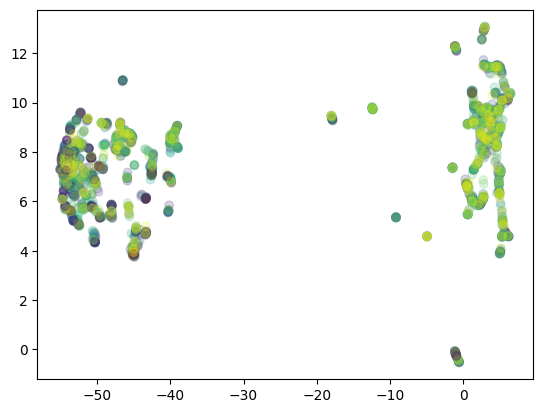

In [53]:
plt.scatter(umap_x[:, 0], umap_x[:, 1], alpha=0.2, c=y_dbscan)

#### Al tratar de probar los diferentes puntajes, intentando encontrar un numero optimo de clusters, vemos que tiene sentido el numero de clusters. 

In [ ]:
n_samples = [1,2,3,4,5]
n_eps=[0.001, 0.01, 0.06, 0.1, 0.6, 1, 1.5, 2]
score = []

for eps in n_eps:
  for samples in n_samples:
    modelo = DBSCAN(eps=eps, min_samples=samples)
    y_dbscan = modelo.fit_predict(test_scaled)
    s = silhouette_score(test_scaled, y_dbscan)
    score.append([s, y_dbscan, eps, samples, len(set(y_dbscan))])

res = pd.DataFrame(score, columns=['score', 'y', 'eps', 'samples', 'clusters']).sort_values(by='score', ascending=False)
res.head(5)

In [126]:
val = res[res['clusters'] == res['clusters'].min()]['y']
len(set(val.values[0]))

29

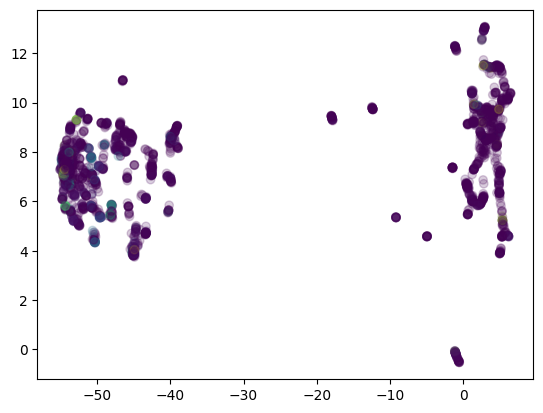

In [121]:
plt.scatter(umap_x[:, 0], umap_x[:, 1], alpha=0.2, c=val.values[0])

In [97]:
n_samples = [1,2,3,4,5]
n_eps=[0.001, 0.01, 0.06, 0.1, 0.6, 1, 1.5, 2]
y_res = []

for eps in n_eps:
  for samples in n_samples:
    modelo = DBSCAN(eps=eps, min_samples=samples)
    y_dbscan = modelo.fit_predict(test_scaled)
    y_res.append(y_dbscan)

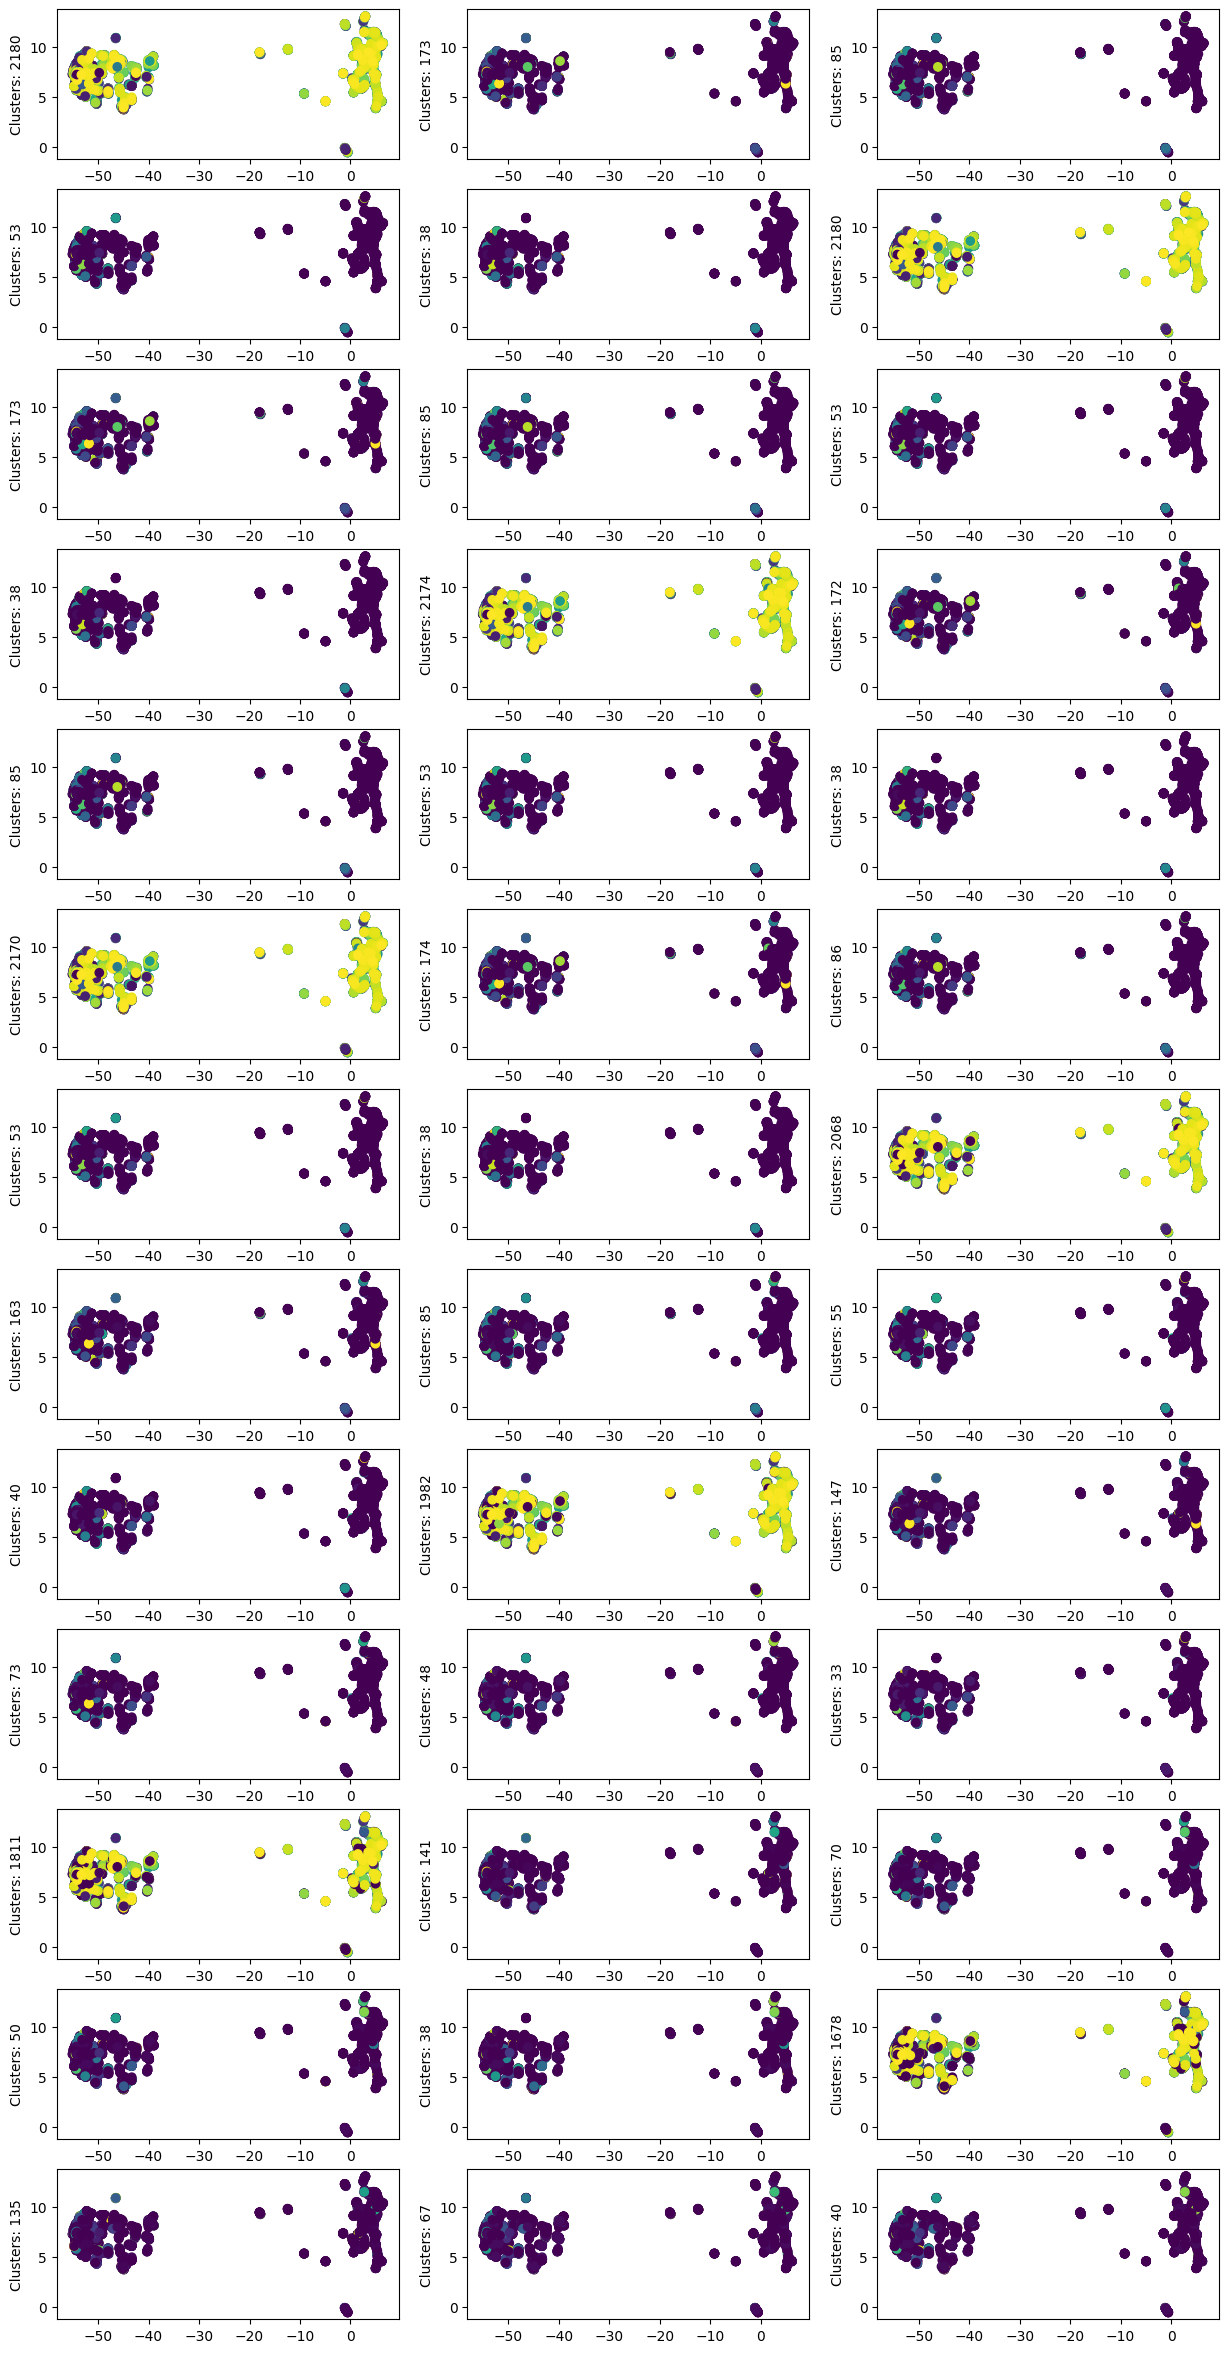

In [99]:
fig = plt.figure(figsize=(15, 30))

for j in range(1, 40):
  ax = fig.add_subplot(13, 3, j)
  plt.scatter(umap_x[:, 0], umap_x[:, 1], c=y_res[j-1])
  plt.ylabel(f'C: {len(set(y_res[j-1]))} ')

plt.show();

### No mejora significativamente, gracias al numero de clientes por cluster

In [154]:
unique, counts = np.unique(val.values[0], return_counts=True)
print(np.asarray((unique, counts)).T)

[[  -1 1813]
 [   0  586]
 [   1   12]
 [   2    7]
 [   3   10]
 [   4   10]
 [   5   14]
 [   6   27]
 [   7    5]
 [   8    5]
 [   9   25]
 [  10   14]
 [  11    7]
 [  12    5]
 [  13    5]
 [  14    7]
 [  15   10]
 [  16    8]
 [  17   11]
 [  18    7]
 [  19   14]
 [  20    5]
 [  21    7]
 [  22    7]
 [  23    6]
 [  24   11]
 [  25    6]
 [  26    5]
 [  27    5]]


In [143]:
modelo = make_pipeline(
  StandardScaler(),
  UMAP(n_components=2),
  DBSCAN()    
)

y_test_dbscan = modelo.fit_predict(test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [145]:
len(set(y_test_dbscan))

8

In [146]:
unique, counts = np.unique(y_test_dbscan, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 434]
 [  1 706]
 [  2 128]
 [  3 396]
 [  4 665]
 [  5 250]
 [  6  22]
 [  7  53]]


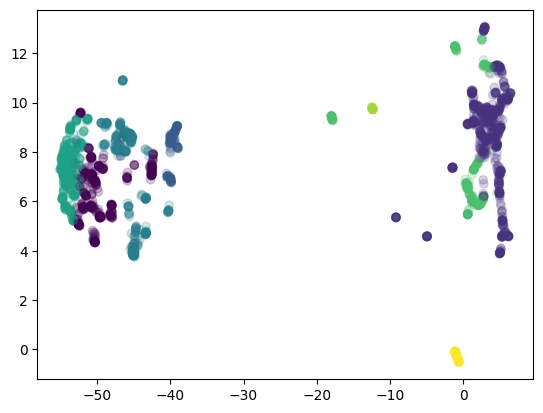

In [144]:
plt.scatter(umap_x[:, 0], umap_x[:, 1], c=y_test_dbscan, alpha=0.2)

In [147]:
new = pd.DataFrame()
new['Cliente'] = test.index
new['y'] = y_test_dbscan
foo = pd.merge(new, df2, on='Cliente')
foo

,Cliente,y,Producto
0,PUBLICO GENERAL ( Bogota),1,"[TORNILLO, CHAZO, CABLE, LONAS, REMACHE]"
1,101 PARK HOUSE ( Bogota),1,"[ARMELLA, CHAZO, LONAS, CORDEL, CANALETA]"
2,2 KINSE SAS ( Bogota),1,"[REMACHE, BREAKET, BROCAS, LIJA, PILA]"
3,27 CASAS ALMA INMOBILIARIA ( Bogota),4,[ANTICORROSIVO]
4,3 AR SAS ( Bogota),0,"[ATORNILLADOR, ESQUINERA, REMACHADORA, RODILLO]"
...,...,...,...
2649,ZION CONSTRUCCIONES SAS ( Bogota),3,[TUBO]
2650,ZYTATECH SAS ( Bogota),1,"[AMARRE, ACOPLE, ALUMANTO, ESTUCO]"
2651,edificio calle 102 ( Bogota),4,"[EMULTEXSA, TELA]"
2652,gv ingenieros LTDA ( Bogota),4,[ESTOPA]


In [148]:
c = pd.get_dummies(foo['Producto'].apply(pd.Series).stack()).sum(level=0)
foo = pd.concat([foo, c], axis=1)
foo

<ipython-input-148-e957e0ec2831>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  c = pd.get_dummies(foo['Producto'].apply(pd.Series).stack()).sum(level=0)


,Cliente,y,Producto,ABRAZADERA,ACEITE,ACIDO,ACOPLE,ACRILICA,ACRONAL,ADAPTADOR,...,VINILTEX,VINILUX,VIRUTA,Vigueta,WASA,WING,YEE,YESO,ZUNCHO,hilo
0,PUBLICO GENERAL ( Bogota),1,"[TORNILLO, CHAZO, CABLE, LONAS, REMACHE]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,101 PARK HOUSE ( Bogota),1,"[ARMELLA, CHAZO, LONAS, CORDEL, CANALETA]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2 KINSE SAS ( Bogota),1,"[REMACHE, BREAKET, BROCAS, LIJA, PILA]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27 CASAS ALMA INMOBILIARIA ( Bogota),4,[ANTICORROSIVO],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3 AR SAS ( Bogota),0,"[ATORNILLADOR, ESQUINERA, REMACHADORA, RODILLO]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,ZION CONSTRUCCIONES SAS ( Bogota),3,[TUBO],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2650,ZYTATECH SAS ( Bogota),1,"[AMARRE, ACOPLE, ALUMANTO, ESTUCO]",0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2651,edificio calle 102 ( Bogota),4,"[EMULTEXSA, TELA]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2652,gv ingenieros LTDA ( Bogota),4,[ESTOPA],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


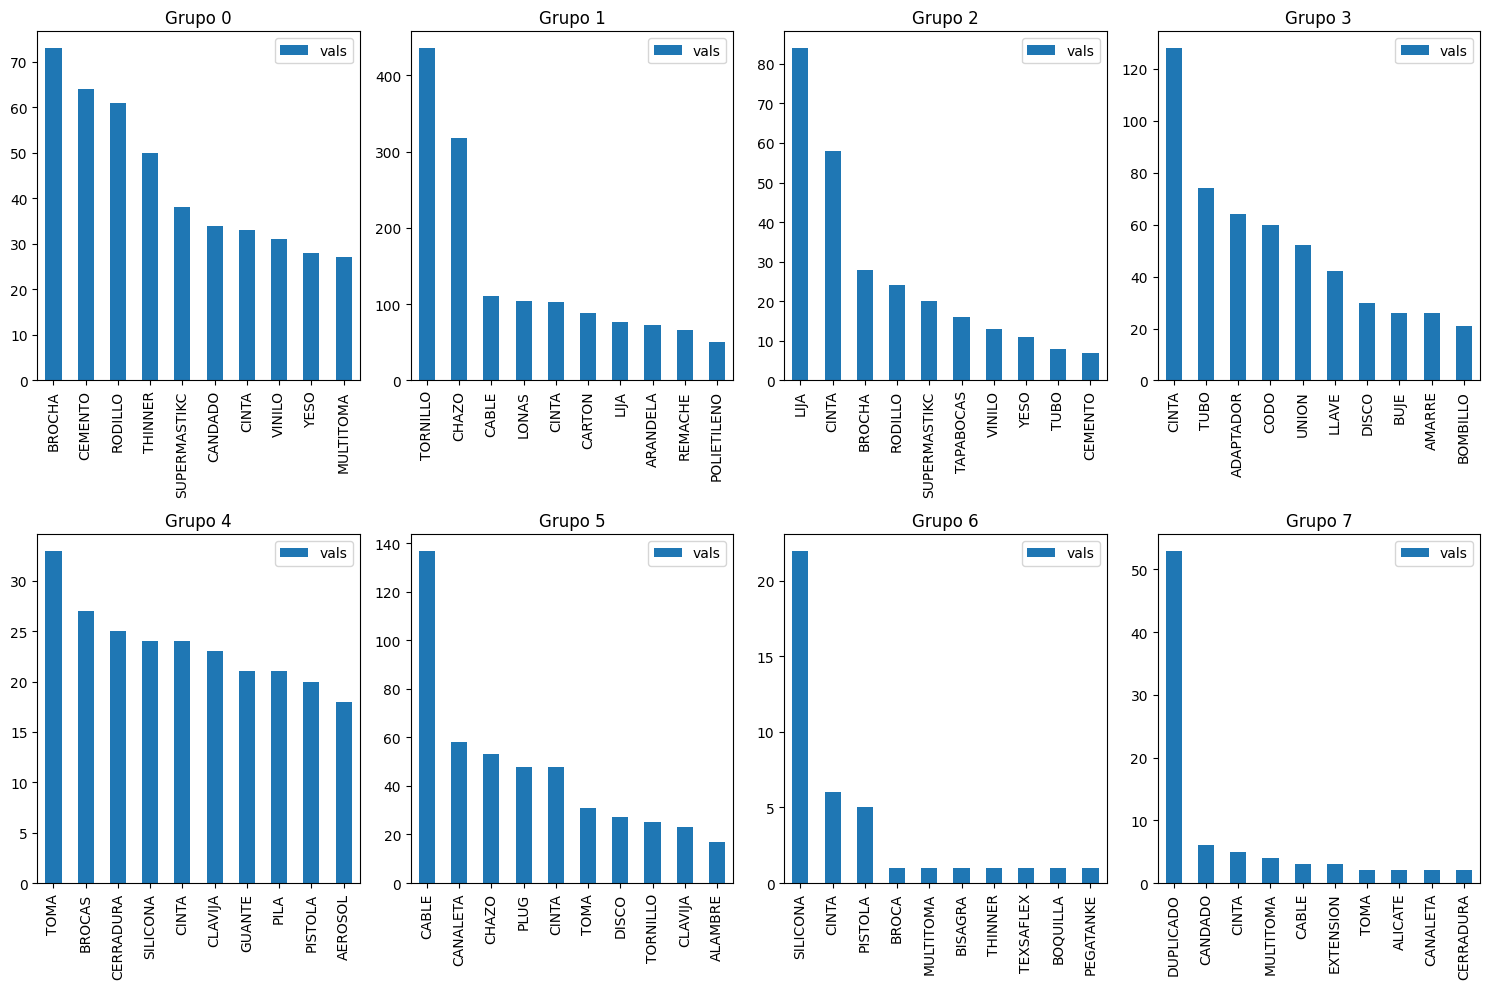

In [153]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
axe = axes.ravel()

for i in range(8):
  df = foo.loc[foo['y'] == i].iloc[:, 3:]
  cols = pd.DataFrame()
  cols['vals'] = df.sum()
  cols.sort_values(by='vals', ascending=False).head(10).plot(kind="bar", ax=axe[i], title=f'Grupo {i}')

plt.tight_layout()

### Finalmente probamos con sus valores por defecto, generando un numero de clusters interesante para el negocio, podemos ver una fuerte correlación entre el top de productos de cada grupo. Lo que genera confianza en el resultado